# IMPORTING LIBRARIES

In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#import xgboost as xgb
from sklearn.metrics import mean_squared_error,r2_score


## Import Dataset(Train and test)

In [75]:
train=pd.read_csv(r'C:\Users\Astha Saraswat\Downloads\Dataset\train.csv')
train_label=pd.read_csv(r'C:\Users\Astha Saraswat\Downloads\Dataset\train_label.csv',header=None)

test=pd.read_csv(r'C:\Users\Astha Saraswat\Downloads\Dataset\test.csv')
test_label=pd.read_csv(r'C:\Users\Astha Saraswat\Downloads\Dataset\test_label.csv',header=None)

### Adding train and test label to the train and test data

In [76]:
train['Total_booking']=train_label[0]
test['Total_booking']=test_label[0]

## Read Dataset

In [77]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184


In [78]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668


# EDA and  Visualization of data 

### Extracting Date,hour,weekday,month from datetime column

In [79]:
train['Date']= train.datetime.apply(lambda x : x.split()[0])
train['hour'] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["weekday"] = train.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
train["month"] = train.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])



test['Date'] = test.datetime.apply(lambda x : x.split()[0])
test['hour'] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["weekday"] = test.Date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%m/%d/%Y").weekday()])
test["month"] = test.Date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%m/%d/%Y").month])



In [80]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September


In [81]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,5/10/2012,11,Thursday,May
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,6/9/2012,7,Saturday,June
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,3/6/2011,20,Sunday,March
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,10/13/2011,11,Thursday,October
4,6/2/2012 12:00,Summer,0,0,Clear + Few clouds,25.42,31.060,43,23.9994,668,6/2/2012,12,Saturday,June


In [82]:
df=train.copy()
df_test=test.copy()

### Temperature observed in each season

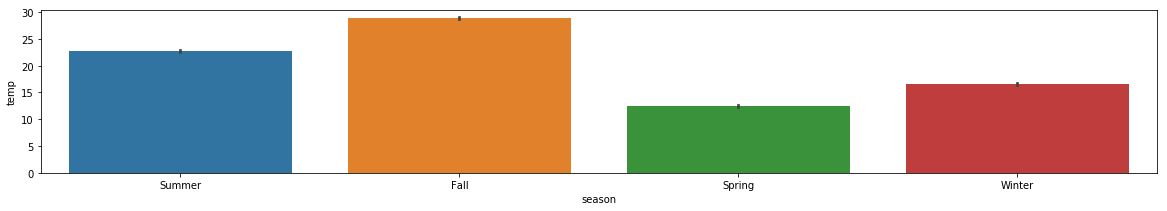

In [83]:
sns.barplot(data=df,x='season',y='temp')

 As we can see from bar graph  that fall season has maximum temperature.

###### relation between season and atemp(kind of body temperature)

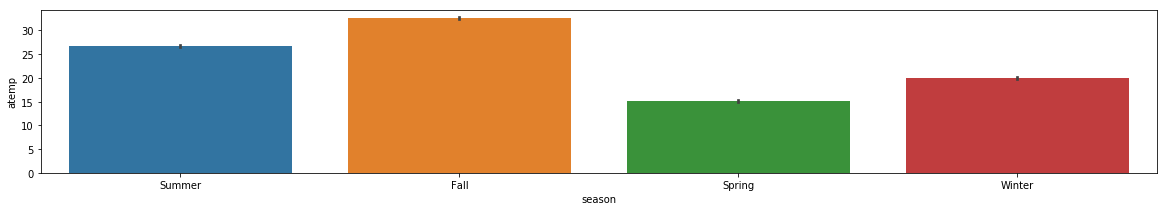

In [84]:
sns.barplot(data=df,x='season',y='atemp')

It is clear from graph that fall season has maximum atemp

###### Relation between season and humidity

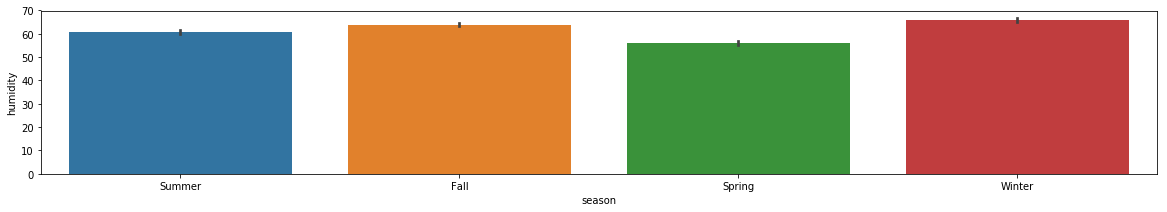

In [85]:
sns.barplot(data=df,x='season',y='humidity')

From above graph it is shown that winter has slightly more value of humidity than fall season.

###### Relation between season and windspeed

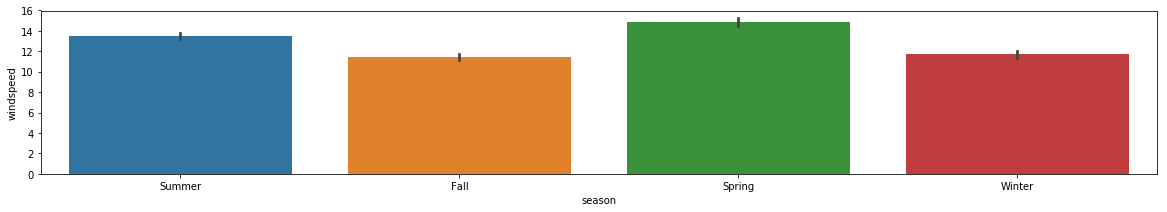

In [86]:
sns.barplot(data=df,x='season',y='windspeed')

Spring season has the maximum windspeed,fall and winter seasons are having nearly equal windspeeds.

###### Weather observed in various seasons

In [87]:
df['Total records']=1


In [88]:
a=df.groupby(['season','weather'])['Total records'].sum().reset_index()
a

,season,weather,Total records
0,Fall,Clear + Few clouds,1547
1,Fall,"Light Snow, Light Rain",158
2,Fall,Mist + Cloudy,484
3,Spring,Clear + Few clouds,1400
4,Spring,Heavy Rain + Thunderstorm,1
5,Spring,"Light Snow, Light Rain",165
6,Spring,Mist + Cloudy,570
7,Summer,Clear + Few clouds,1446
8,Summer,"Light Snow, Light Rain",175
9,Summer,Mist + Cloudy,576


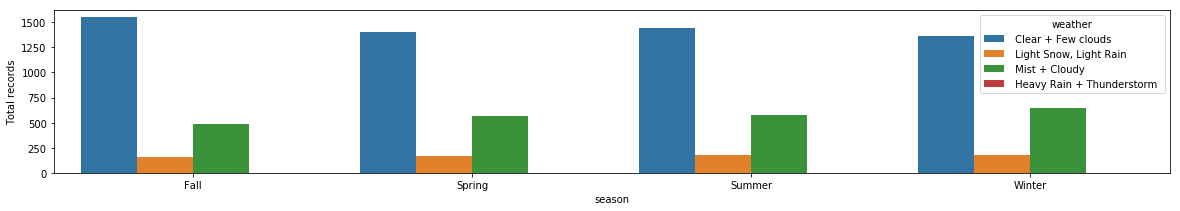

In [89]:
sns.barplot(data=a,x='season',y='Total records',hue='weather')

It is observed that most frequent phenomenon is Clear+ Few Clouds in every season,while Heavy Rain + Thunderstorm is least occuring phenomenon.

In [90]:
# drop the Total records column
df=df.drop('Total records',axis=1)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,5/2/2012,19,Wednesday,May
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,9/5/2012,4,Wednesday,September
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,1/13/2011,9,Thursday,January
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,11/18/2011,16,Friday,November
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,9/13/2011,13,Tuesday,September
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791,8/17/2012,17,Friday,August
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395,10/6/2012,9,Saturday,October
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5,9/10/2012,4,Monday,September
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9,7/14/2012,4,Saturday,July
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78,2/6/2011,18,Sunday,February


# Outliar Analysis

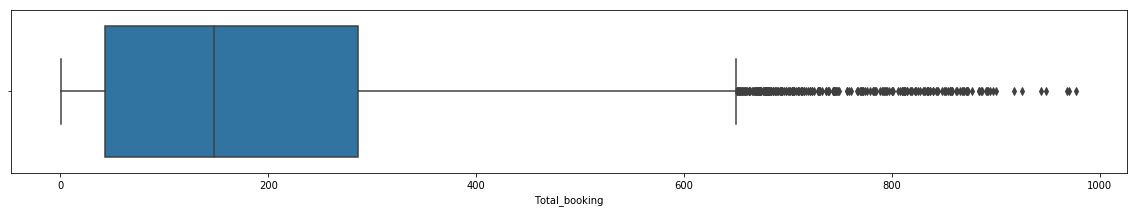

In [91]:
data = sns.boxplot(x = df['Total_booking'])

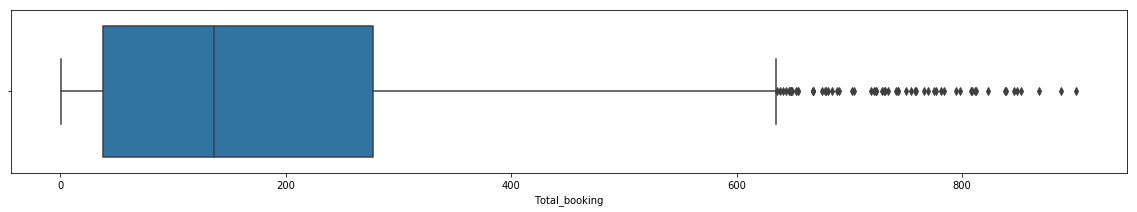

In [92]:
data=sns.boxplot(x = df_test['Total_booking'])

We have observed that outliars are present in the train and test data when Total bookigs value is greater than 600,so we have to remove them.Lets apply hit and trial and check.

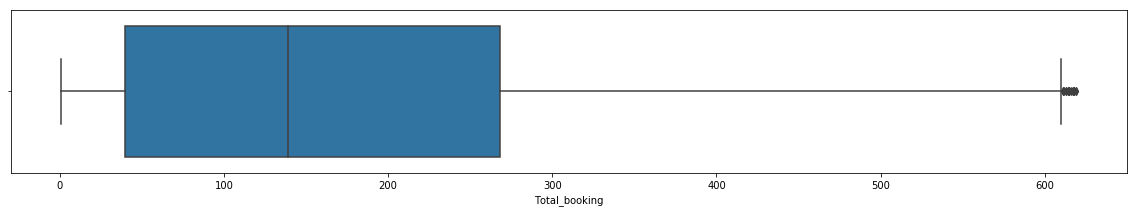

In [93]:
data = sns.boxplot(x = df[df['Total_booking']<620]['Total_booking'])

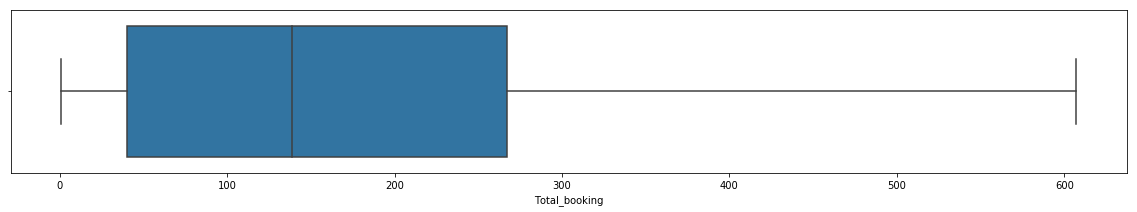

In [94]:
data = sns.boxplot(x = df[df['Total_booking']<608]['Total_booking'])

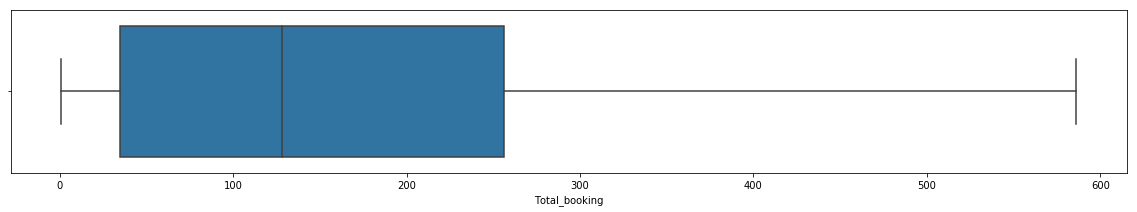

In [95]:
data = sns.boxplot(x = df_test[df_test['Total_booking']<590]['Total_booking'])

So by hit and trial we have observed from above graph that outliars are present when Total_booking is less than 620 and no outliar is present when total booking is less than 608 for training data.
Similarly,for testing data no outliar is present below 590. We have a clean boxplot after removing outliars.

###### Selecting outliar free data for further analysis

In [96]:
train_filter = df[df['Total_booking']<608]
test_filter = df_test[df_test['Total_booking']<590]

# Missing value Analysis

In [97]:
train_filter.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Date             0
hour             0
weekday          0
month            0
dtype: int64

In [98]:
test_filter.isnull().sum()

datetime         0
season           0
holiday          0
workingday       0
weather          0
temp             0
atemp            0
humidity         0
windspeed        0
Total_booking    0
Date             0
hour             0
weekday          0
month            0
dtype: int64

No missing values in the train and test data. No need to do anything with this.

# Total booking Vs Other features

##### Lets check the impact of month on  Total_booking

In [99]:
month_df=train_filter[['month','Total_booking']]


In [100]:
month_list=month_df['month'].tolist()



In [101]:
value=[]

for i in month_list:

    if i=='January':
        value.append(1)
                
    elif i=='February':
        value.append(2)
    elif i=='March':
        value.append(3)
    elif i=='April':
        value.append(4)
    elif i=='May':
        value.append(5)
    elif i=='June':
        value.append(6)
    elif i=='July':
        value.append(7)
    elif i=='August':
        value.append(8)
    elif i=='September':
        value.append(9)
    elif i=='October':
        value.append(10)
    elif i=='November':
        value.append(11)
    elif i=='December':
        value.append(12)
        
          
    


In [102]:
month_df['month_val']=value
month_df

,month,Total_booking,month_val
0,May,504,5
1,September,5,9
2,January,139,1
3,November,209,11
4,September,184,9
6,October,395,10
7,September,5,9
8,July,9,7
9,February,78,2
10,January,129,1


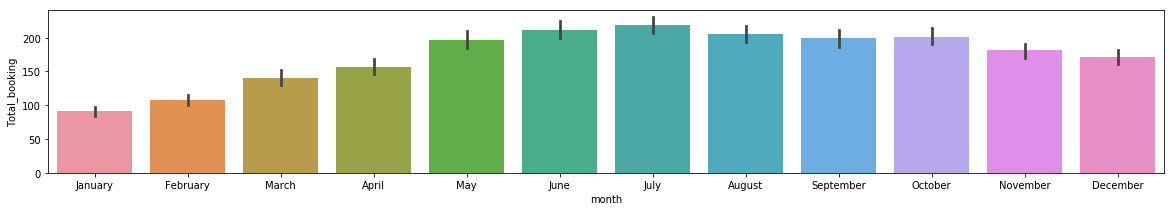

In [103]:
sns.barplot(data =month_df.sort_values(by='month_val') , x = 'month',y = 'Total_booking')
plt.rcParams['figure.figsize'] = (20,3)

We have observed a gradual increase in months till mid of the year(june and july),afterwards cab booking decreases gradually.

##### Lets check impact of season on Total_booking

In [104]:
season_df = train_filter[['season','Total_booking','month']]
print("Summer:",set(season_df[season_df['season']=='Summer']['month']))
print("Fall:",set(season_df[season_df['season']=='Fall']['month']))
print("Spring:",set(season_df[season_df['season']=='Spring']['month']))
print("Winter:",set(season_df[season_df['season']=='Winter']['month']))


Summer: {'April', 'May', 'June'}
Fall: {'August', 'July', 'September'}
Spring: {'March', 'February', 'January'}
Winter: {'November', 'October', 'December'}


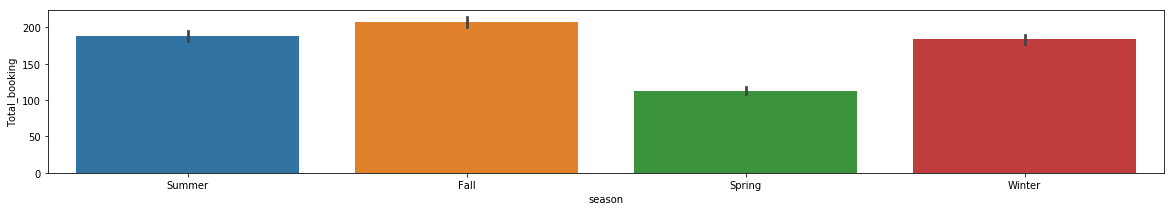

In [105]:
sns.barplot(data = season_df,x = 'season',y = 'Total_booking')


Maximum cab booking is found in season fall and minimum cab booking in season spring. It shows that people want to move out more in month of fall.

##### Lets analyse temperatue and total booking

In [106]:
temp_df=train_filter[['temp','Total_booking']]

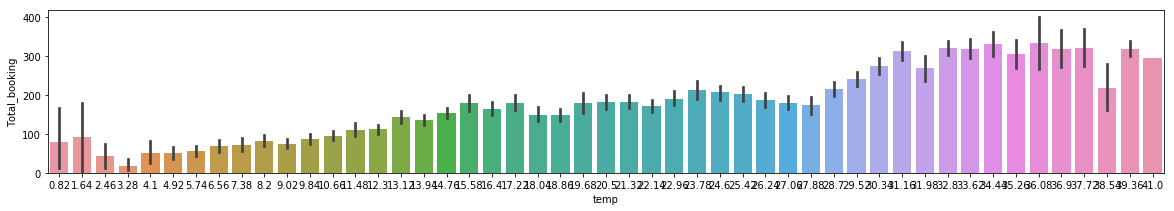

In [107]:
sns.barplot(data = temp_df,x = 'temp',y = 'Total_booking')


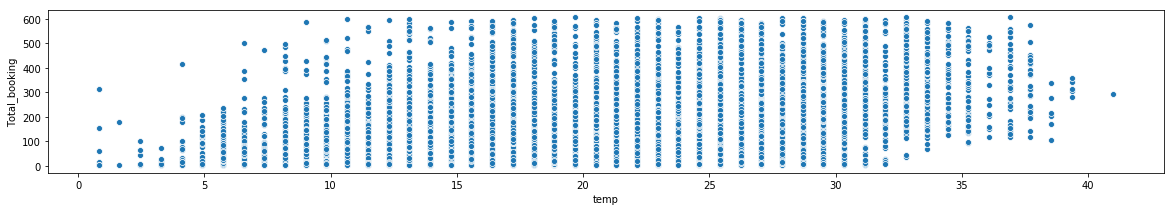

In [108]:
sns.scatterplot(data = temp_df,x = 'temp',y = 'Total_booking')


As temperature is not clearly predictable by bargraph ,so we have plotted a scatter plot.By the above plot it can be say that people want to visit in 15-33 degree temperature range and as the temperature increases above 40,we can see very fewer bookings there.People want to stay home at higher temperatures.

###### Impact of atemp or kind of body temperature on Total bookings

In [109]:
temp_df=train_filter[['atemp','Total_booking']]

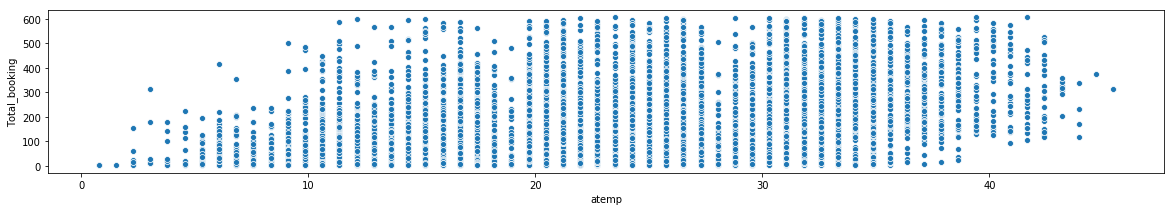

In [110]:
sns.scatterplot(data = temp_df,x = 'atemp',y = 'Total_booking')


Same case for atemp.When it feels like more body temperature ,one wants to stay at home.It is visible through scatter plot that after 40 or 45 we can see very fewer bookings.We can also plot the difference of temp and atemp with total bookings.Higher the difference lesser the bookings.

###### Analysis of weather and total booking

In [111]:
weather_df = train_filter[['weather','Total_booking']]


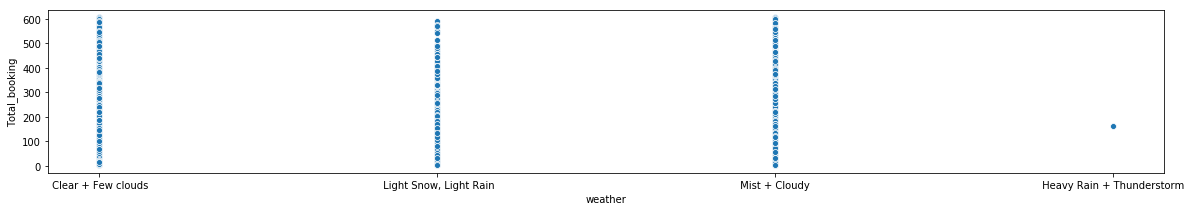

In [112]:
sns.scatterplot(data = weather_df,x = 'weather',y = 'Total_booking')


Most of the cab bookings are taken place during (Clear + few clouds) weather and we can emphasize on it while plotting the graph with humidity. In Mist +cloudy weather and in light snow,light rain we can see good no of bookings.But while Heavy rain + thunderstorm we can see negligible bookings or no bookings.

###### Analysis between  humidity and Total_booking

In [113]:
humidity_df = train_filter[['humidity','Total_booking','weather']]


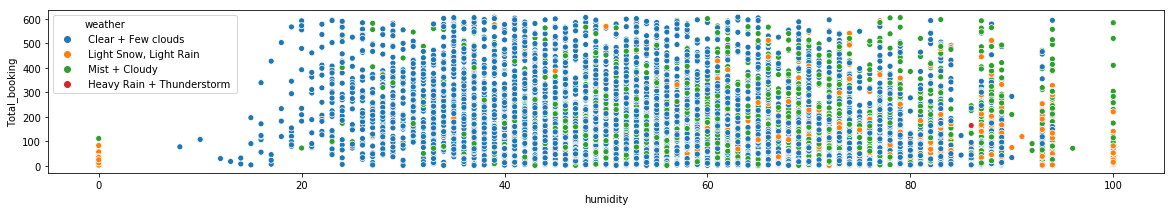

In [114]:
sns.scatterplot(data = humidity_df,x = 'humidity',y = 'Total_booking',hue='weather')


Humidity has no such impact on total bookings as people are visiting in wide range of humidities.Most of the cab bookings are recorded in clear + few clouds weather and negligible in thunderstorm which make sense.

###### Analysis between Windspeed and total bookings

In [115]:
windspeed_df = train_filter[['windspeed','Total_booking']]


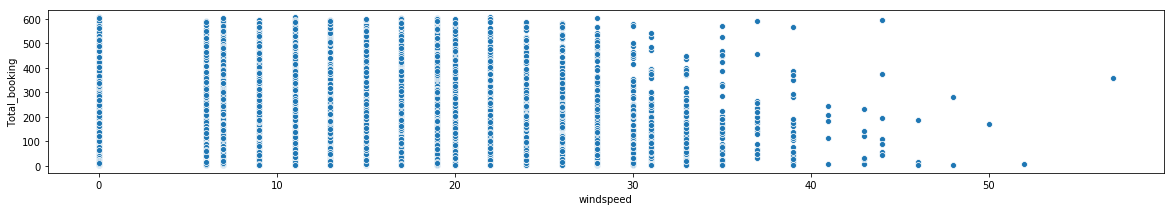

In [116]:
sns.scatterplot(data = windspeed_df,x = 'windspeed',y = 'Total_booking')


It has no such large impact on total bookings. As we can see cab bookings in wide range of windspeed,but yes we can say that after 45 or 50 there are fewerer bookings.

###### Impact of working days on Total bookings

In [117]:
hour_df = train_filter[(train_filter['holiday'] == 0)&(train_filter['workingday'] == 1)][['hour','Total_booking']].sort_values(by='hour')


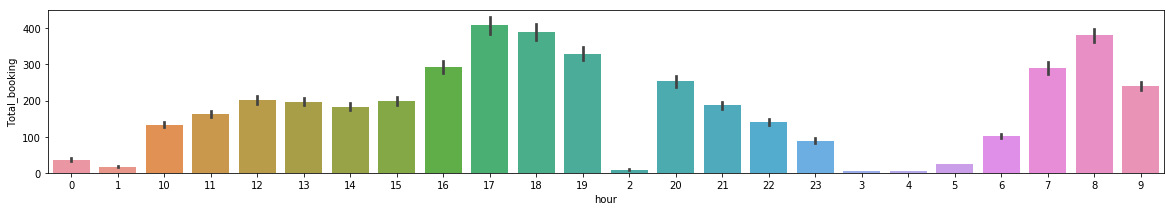

In [118]:
sns.barplot(data = hour_df,x = 'hour',y = 'Total_booking')


We can see here that cab bookings are higher in morning time gradually increases from 6 am then come to a uniform rate in afternoon and in evening it again starts increasing after 4 pm or 16 showing a good no of cab bookings and in night it almost comes to rest or very fewer bookings are there which is very obvious because people are visiting to office in early mornings and coming back to  home at evenings .People sleep at night and in that durations we camn see less no of bokings.

###### Analysis between holiday and total bookings

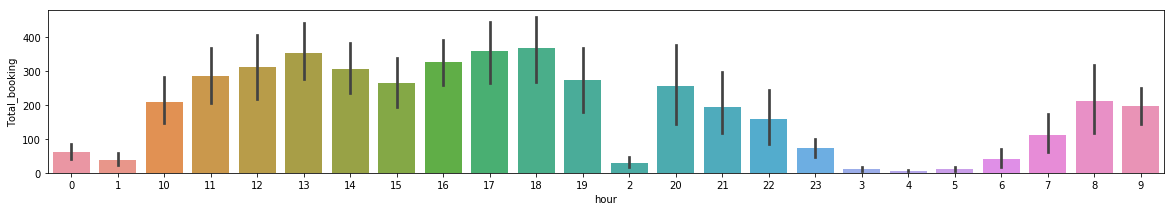

In [119]:
holiday_df = train_filter[(train_filter['workingday'] == 0)&(train_filter['holiday'] == 1)][['hour','Total_booking']].sort_values(by='hour')
sns.barplot(data=holiday_df,x='hour',y='Total_booking')
plt.rcParams['figure.figsize'] = (20,3)


During holidays people are  not going to office so it does not show  the previous trend of higher bookings in morning and in evening. But it shows higher cab bookings in afternoon and in evening time period.As there is no hurry for office we can see good no of bookings after 10 am and afterwards which starts decreasing at night.

###### Label Encoding the categorical values

In [120]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [121]:
train_filter['hour'] = le.fit_transform(train_filter['hour'])
train_filter['Date'] = le.fit_transform(train_filter['Date'])
train_filter['month'] = le.fit_transform(train_filter['month'])


train_filter

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,hour,weekday,month
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504,289,11,Wednesday,8
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5,447,18,Wednesday,11
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139,8,23,Thursday,4
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209,94,8,Friday,9
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184,426,5,Tuesday,11
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395,69,23,Saturday,10
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5,421,18,Monday,11
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9,353,18,Saturday,5
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78,182,10,Sunday,3
10,1/17/2012 15:00,Spring,0,1,Clear + Few clouds,18.04,21.970,62,32.9975,129,17,7,Tuesday,4


In [122]:
test_filter['hour'] = le.fit_transform(test_filter['hour'])
test_filter['Date'] = le.fit_transform(test_filter['Date'])
test_filter['month'] = le.fit_transform(test_filter['month'])

test_filter



,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,Date,hour,weekday,month
0,5/10/2012 11:00,Summer,0,1,Clear + Few clouds,21.32,25.000,48,35.0008,256,269,3,Thursday,8
1,6/9/2012 7:00,Summer,0,0,Clear + Few clouds,23.78,27.275,64,7.0015,87,340,21,Saturday,6
2,3/6/2011 20:00,Spring,0,0,"Light Snow, Light Rain",11.48,12.120,100,27.9993,11,220,13,Sunday,7
3,10/13/2011 11:00,Winter,0,1,Mist + Cloudy,25.42,28.790,83,0.0000,84,46,3,Thursday,10
5,4/1/2011 23:00,Summer,0,1,Clear + Few clouds,12.30,15.910,61,6.0032,53,228,16,Friday,0
6,5/15/2011 18:00,Summer,0,0,Clear + Few clouds,22.96,26.515,78,16.9979,237,277,10,Sunday,8
8,10/12/2012 16:00,Winter,0,1,Clear + Few clouds,18.86,22.725,41,23.9994,520,45,8,Friday,10
9,3/18/2011 3:00,Spring,0,1,Clear + Few clouds,14.76,17.425,71,12.9980,5,208,17,Friday,7
10,7/6/2011 1:00,Fall,0,1,Clear + Few clouds,28.70,33.335,74,8.9981,15,371,1,Wednesday,5
11,7/2/2012 12:00,Fall,0,1,Clear + Few clouds,34.44,36.365,32,12.9980,257,364,4,Monday,5


# Correlation Analysis and Feature Engineering

#### Let us plot the heat map and do some feature engineering

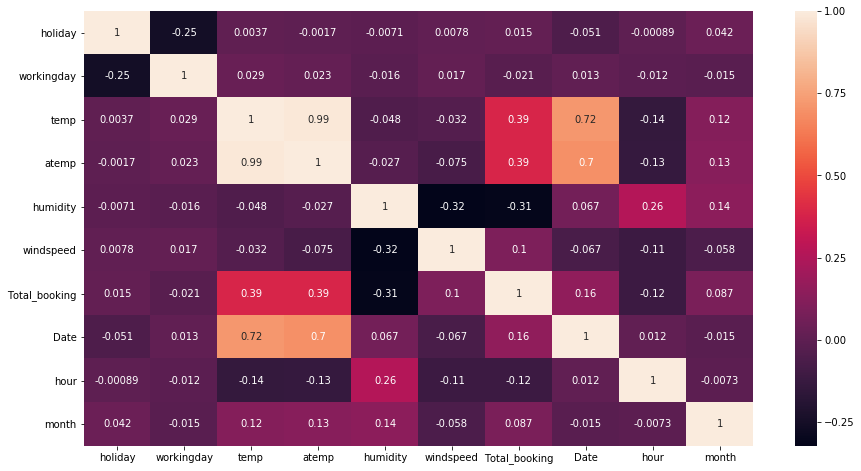

In [123]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(train_filter.corr(),annot=True,ax=ax)



We have seen features with strong correlation and weak correlation through heat map.temp and atemp showing good correlation ,we will drop atemp in further analysis. Lets do one hot encoding first because features like season,weather,weekday cannot be greater or smaller from one another.

In [124]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [126]:
train_filter = pd.get_dummies(train_filter,columns = ['season','weather','weekday'])
test_filter= pd.get_dummies(test_filter,columns = ['season','weather','weekday'])


In [127]:
train_filter.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Total_booking', 'Date', 'hour', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Heavy Rain + Thunderstorm ',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Friday', 'weekday_Monday', 'weekday_Saturday',
       'weekday_Sunday', 'weekday_Thursday', 'weekday_Tuesday',
       'weekday_Wednesday'],
      dtype='object')

In [128]:
test_filter.columns


Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'Total_booking', 'Date', 'hour', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

###### Drop the columns which we are not going to use in further analysis and to make similar no of columns in train and test dataset

In [129]:
train_filter.drop('datetime',axis = 1,inplace = True)
#train_filter.drop('Date',axis = 1,inplace = True)
train_filter.drop('weather_ Heavy Rain + Thunderstorm ',axis = 1,inplace = True)

test_filter.drop('datetime',axis = 1,inplace = True)
#test_filter.drop('date',axis = 1,inplace = True)
#train_filter



In [130]:
train_filter.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'Total_booking', 'Date', 'hour', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [131]:
test_filter.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed',
       'Total_booking', 'Date', 'hour', 'month', 'season_Fall',
       'season_Spring', 'season_Summer', 'season_Winter',
       'weather_ Clear + Few clouds', 'weather_ Light Snow, Light Rain',
       'weather_ Mist + Cloudy ', 'weekday_Friday', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

### Feature Scaling

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [133]:
feature_scale=[feature for feature in train_filter.columns if feature not in ['Total_booking']]

#scaler=StandardScaler()
scaler.fit(train_filter[feature_scale])
scaler.fit(test_filter[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [134]:
scaler.transform(train_filter[feature_scale])
scaler.transform(test_filter[feature_scale])

array([[-0.17480539,  0.68665781,  0.17114764, ...,  2.49205635,
        -0.40528249, -0.4195718 ],
       [-0.17480539, -1.45632947,  0.4899152 , ..., -0.40127504,
        -0.40528249, -0.4195718 ],
       [-0.17480539, -1.45632947, -1.10392261, ..., -0.40127504,
        -0.40528249, -0.4195718 ],
       ...,
       [-0.17480539,  0.68665781, -0.14761992, ..., -0.40127504,
        -0.40528249,  2.3833823 ],
       [-0.17480539,  0.68665781, -0.36013163, ...,  2.49205635,
        -0.40528249, -0.4195718 ],
       [-0.17480539,  0.68665781,  1.33996204, ..., -0.40127504,
        -0.40528249,  2.3833823 ]])

In [135]:
train_filter_scaled = pd.concat([train_filter[['Total_booking']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_filter[feature_scale]), columns=feature_scale)],
                    axis=1)
test_filter_scaled = pd.concat([test_filter[['Total_booking']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(test_filter[feature_scale]), columns=feature_scale)],
                    axis=1)

In [138]:
train_filter_scaled.shape


(8390, 24)

In [139]:
test_filter_scaled.shape 


(2091, 24)

## Feature Selection by  Lasso Regression

In [140]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [141]:
X_train = train_filter_scaled.iloc[:,1:]
y_train = train_filter_scaled.iloc[:,0]
X_test = test_filter_scaled.iloc[:,1:]
y_test = test_filter_scaled.iloc[:,0]

In [142]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.10, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [143]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True])

In [144]:
selected_feat = X_train.columns[(feature_sel_model.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 23
selected features: 19
features with coefficients shrank to zero: 4


In [145]:
X_train=X_train[selected_feat]
X_test = X_test[selected_feat]

## Correlation Filter

In [146]:
X_train_corr = pd.concat([train_filter_scaled[['Total_booking']].reset_index(drop=True),
                    pd.DataFrame(train_filter_scaled[selected_feat], columns=selected_feat)],
                    axis=1)
X_info_train_corr = X_train_corr.corr()
X_info_train_corr['Total_booking'].abs().sort_values(ascending = False)

Total_booking                      1.000000
temp                               0.388238
atemp                              0.385389
humidity                           0.310491
Date                               0.156677
season_Fall                        0.130136
weather_ Light Snow, Light Rain    0.123123
hour                               0.115925
windspeed                          0.100759
month                              0.086930
season_Summer                      0.058914
season_Winter                      0.042442
weather_ Mist + Cloudy             0.026340
weekday_Saturday                   0.024129
workingday                         0.021164
weekday_Friday                     0.020550
weekday_Wednesday                  0.017619
holiday                            0.015375
weekday_Monday                     0.005491
weekday_Thursday                   0.005295
Name: Total_booking, dtype: float64

##### We have seen correlation here and now we have to choose  better features for further analysis.Now,we can drop 'atemp' from train and test dataset

In [147]:
value = X_info_train_corr['Total_booking'].abs()
columns = X_train_corr.columns
selected = []
for i in range(0, len(value)):
    if value[i] == 1:
        continue
    if value[i] > 0.01:
        selected.append(columns[i])
X_train_new  = X_train_corr[selected]

X_train_new.drop('atemp',axis = 1,inplace = True)


In [148]:
X_train_new.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Date',
       'hour', 'month', 'season_Fall', 'season_Summer', 'season_Winter',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Wednesday'],
      dtype='object')

In [149]:
X_test_new = X_test[selected]

X_test_new.drop('atemp',axis = 1,inplace = True)

X_test_new.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Date',
       'hour', 'month', 'season_Fall', 'season_Summer', 'season_Winter',
       'weather_ Light Snow, Light Rain', 'weather_ Mist + Cloudy ',
       'weekday_Friday', 'weekday_Saturday', 'weekday_Wednesday'],
      dtype='object')

In [150]:
X_train_new.replace(np.inf, np.nan)
X_train_new.dropna(inplace =True) 
X_test_new.replace(np.inf, np.nan)
X_test_new.dropna(inplace =True) 

# Hyperparameter Tuning

# Grid Search

In [151]:
best_estimators = []
best_params = []

In [152]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lin_reg=LinearRegression()



Linear Regression and Lasso

In [153]:
alpha = [0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100,500,1000]
param1_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param1_grid,scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train_new, y_train)
best_params.append(grid_result.best_params_)
best_estimators.append(grid_result.best_estimator_)

Fitting 3 folds for each of 19 candidates, totalling 57 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  57 | elapsed:    9.0s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    9.1s finished


SVR(Support Vector Regression)

In [154]:
svr = SVR(kernel='rbf')
param = {'kernel':['rbf'],'gamma':[0.01,0.1,1],'C':[0.01,0.1,1,10]}
svr_gridsearch = GridSearchCV(svr,param_grid = param,n_jobs=-1,cv=5)
svr_gridsearch.fit(X_train_new, y_train)
best_params.append(svr_gridsearch.best_params_)
best_estimators.append(svr_gridsearch.best_estimator_)

DTR(Decision Tree Regression)

In [155]:
dtr = DecisionTreeRegressor()
param = {'max_features':[1,2,3,4,5,6,7,8,9],'random_state':list(range(11))}
dtr_gridsearch = GridSearchCV(dtr,param_grid = param,n_jobs=-1,cv=5)
dtr_gridsearch.fit(X_train_new, y_train)
best_params.append(dtr_gridsearch.best_params_)
best_estimators.append(dtr_gridsearch.best_estimator_)

RF(Random Forest Regression)

In [156]:
rf = RandomForestRegressor()
param = {'n_estimators':[50,100,200],'max_features':[1,2,3,4,5,6,7,8,9]}
rf_gridsearch = GridSearchCV(rf,param_grid=param,n_jobs=-1,cv=5)
rf_gridsearch.fit(X_train_new, y_train)
best_params.append(rf_gridsearch.best_params_)
best_estimators.append(rf_gridsearch.best_estimator_)

Ada Boost Regression

In [157]:
ada = AdaBoostRegressor()
param = {'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,1]}
ada_gridsearch = GridSearchCV(ada,param_grid = param,n_jobs=-1,cv=5)
ada_gridsearch.fit(X_train_new, y_train)
best_params.append(ada_gridsearch.best_params_)
best_estimators.append(ada_gridsearch.best_estimator_)

GBR(Gradient Boosting Regression)

In [158]:
gbr = GradientBoostingRegressor()
param = {'n_estimators':[50,100,200],'learning_rate':[0.01,0.1,1]}
gbr_gridsearch = GridSearchCV(gbr,param_grid = param,n_jobs=-1,cv=10)
gbr_gridsearch.fit(X_train_new, y_train)
best_params.append(gbr_gridsearch.best_params_)
best_estimators.append(gbr_gridsearch.best_estimator_)

In [159]:
for i in range(0,len(best_estimators)):
    #print(best_params[i])
    print(best_estimators[i])


Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=9,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=9, splitter='best')
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbos

In [161]:
lr_result = best_estimators[0]
SVR_result = best_estimators[1]
dtr_result = best_estimators[2]
rfr_result = best_estimators[3]
ada_result = best_estimators[4]
gbr_result = best_estimators[5]
models_result = [lr_result,SVR_result,dtr_result,rfr_result,ada_result,gbr_result]
models_result

[Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False),
 SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
   kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=9,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=9, splitter='best'),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=None, oob_score=False,
            random

## Check the model performace when we have done with hyperpaameter tuning

In [162]:
train_r2score=[]
test_r2score=[]
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []




In [163]:
for model in models_result:
    model.fit(X_train_new,y_train)
    y_train_pred_after_datapreproc=model.predict(X_train_new)
    y_test_pred_after_datapreproc = model.predict(X_test_new)
    train_r2score.append((round(r2_score(y_train, y_train_pred_after_datapreproc),2)))
    test_r2score.append((round(r2_score(y_test, y_test_pred_after_datapreproc),2)))
    mse_train.append((round(mean_squared_error(y_train, y_train_pred_after_datapreproc),2)))
    mse_test.append((round(mean_squared_error(y_test, y_test_pred_after_datapreproc),2)))
    rmse_train.append((round(np.sqrt(mean_squared_error(y_train,  y_train_pred_after_datapreproc)),2)))
    rmse_test.append((round(np.sqrt(mean_squared_error(y_test, y_test_pred_after_datapreproc)),2)))
 



model_score_df = pd.DataFrame([train_r2score,test_r2score,mse_train,mse_test,rmse_train,rmse_test],
                             columns=["LinearRegression","SVR","DecisionTreeRegressor","RandomForestRegressor","AdaBoostRegressor","GradientBoostRegressor"],
                             index=['train_r2score','test_r2score','mse_train','mse_test','rmse_train','rmse_test'])
model_score_df


,LinearRegression,SVR,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,GradientBoostRegressor
train_r2score,0.28,0.41,1.00,0.98,0.56,0.92
test_r2score,0.30,0.42,0.72,0.88,0.57,0.83
mse_train,16341.19,13508.47,0.00,405.64,9990.86,1773.14
mse_test,15323.18,12590.11,6161.15,2655.34,9321.22,3769.70
rmse_train,127.83,116.23,0.00,20.14,99.95,42.11
rmse_test,123.79,112.21,78.49,51.53,96.55,61.40


Ensemble model Random forest is giving good accuracy on train and test dataset.Lasso regression,SVR perform very poor on train and test dataset.As we can see that decision tree algo gives the best accuracy on train dataset and perform poor on test dataset because we know its a greedy algorithm and overfitting is present in its nature so its performance is poor on test dataset. Gradient boosting perform better than Linear Regression and SVR but not better than Random Forest.Ada boost also not perform  well on our model.So lets apply some boosting algos.

## lets apply  ada boosting algorithm and then we will check model accuracy

In [164]:
ada_boost = AdaBoostRegressor(base_estimator=dtr_result, learning_rate=0.1, loss='linear',
                  n_estimators=200, random_state=4) 
gbr_boost = GradientBoostingRegressor(loss='ls',alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=1, max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto', random_state=2,
                          subsample=1.0, tol=0.0001, validation_fraction=0.1,
                          verbose=0, warm_start=False)
            


In [165]:
boost_models=[ada_boost,gbr_boost]

In [166]:
train_r2score = []
test_r2score = []
mse_train = []
mse_test = []
rmse_train = []
rmse_test = []

for model in boost_models:     
    model.fit(X_train_new,y_train)
    y_train_boost=model.predict(X_train_new)
    y_test_boost = model.predict(X_test_new)
    train_r2score.append((round(r2_score(y_train, y_train_boost),2)))
    test_r2score.append((round(r2_score(y_test, y_test_boost),2)))
    mse_train.append((round(mean_squared_error(y_train, y_train_boost),2)))
    mse_test.append((round(mean_squared_error(y_test, y_test_boost),2)))
    rmse_train.append((round(np.sqrt(mean_squared_error(y_train,  y_train_boost)),2)))
    rmse_test.append((round(np.sqrt(mean_squared_error(y_test, y_test_boost)),2)))
 

In [167]:
model_score_df = pd.DataFrame([train_r2score,test_r2score,mse_train,mse_test,rmse_train,rmse_test],
                             columns=["AdaBoostRegressor","GradientBoostingRegressor"],
                             index=['train_r2score','test_r2score','mse_train','mse_test','rmse_train','rmse_test'])
model_score_df


,AdaBoostRegressor,GradientBoostingRegressor
train_r2score,1.00,0.92
test_r2score,0.86,0.83
mse_train,0.61,1773.14
mse_test,3020.17,3768.08
rmse_train,0.78,42.11
rmse_test,54.96,61.38


### Result:- 
Here we can see that after applying the ada boosting algorithm the performance of model increases.Now it is giving better result as compare to previous one.


We have applied different methods,different models in this project,done various analysis and find various intersting sights.Summing up all the work done in one line is .....We have learnt a lot and it was a good experience.